<img src="https://communications.univie.ac.at/fileadmin/_processed_/csm_Uni_Logo_2016_2f47aacf37.jpg" 
     alt="Logo Universität Wien" 
     width="200"/>

# Practical Machine Learning for Natural Language Processing - 2023 SS  

### Assigment 2 - Generators and Classes   

In this assigment we are going to play with generators and instances/classes - structures that retain state.  

***

### 1. Alea Iacta Est  

(a) Using [generator functions](https://github.com/rsouza/Python_Course/blob/master/Notebooks/Python_Basic/03_Functions.ipynb), create an object that emulates an eight-sided dice (1-8) that is biased, such that the probability of this generator function returning a certain value is proportional to the value itself (i.e. the face "6" is 3 times more likely to come out than face "2");  

 <img src="https://cdn11.bigcommerce.com/s-70184/images/stencil/608x608/products/532/7428/d8-dice-blue__64321.1664335674.jpg" alt="8-Dice" style="width:250px;height:300px;"> 

(b) Using [Matplotlib](https://matplotlib.org/) plt.plot or plt.hist commands, show graphically the result of 10000 casts of the die;  

(c) Modify this generator function so that it terminates automatically when all possible values (1,2,3,4,5,6,7,8) have been cast at least once. In this case, it will return the total absolute time that has elapsed since the first iteration.  (hint: a function can have both **return** and **yield** commands)  

In [1]:
# a) 
#importation 
import random

def biased_dice_roll():
    #defininanion of the distributions
    probability_distribution = [1, 2, 3, 4, 5, 6, 7, 8]
    cumulative_distribution = []
    total = 0

    #calculation of the cumulative probability 
    for prob in probability_distribution:
        total += prob
        cumulative_distribution.append(total)

    while True:
        #random number in range 
        rand_num = random.randint(1, total)

        #index of the rand_num
        for i, c_prob in enumerate(cumulative_distribution):
            if rand_num <= c_prob:
                yield i + 1
                break

biased_dice_gen = biased_dice_roll()

#roll the dice
for _ in range(10):
    print(next(biased_dice_gen))


7
7
7
6
1
8
6
7
2
8


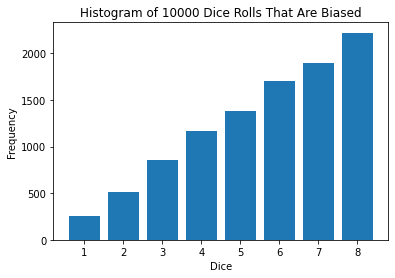

In [2]:
# b)

#importation 
import matplotlib.pyplot as plt

#rolling 
dice_rolls = [next(biased_dice_gen) for _ in range(10000)]

#viz
plt.hist(dice_rolls, bins=range(1, 10), align='left', rwidth=0.8)
plt.xlabel('Dice')
plt.ylabel('Frequency')
plt.title('Histogram of 10000 Dice Rolls That Are Biased')

plt.show()


In [3]:
# c)

#importation
import time

def biased_dice_time():
    probability_distribution = [1, 2, 3, 4, 5, 6, 7, 8]
    cumulative_distribution = []
    total = 0
    start_time = None
    cast_faces = set()

    for prob in probability_distribution:
        total += prob
        cumulative_distribution.append(total)

    while True:
        if not start_time:
            start_time = time.time()

        rand_num = random.randint(1, total)
        dice_face = None

        for i, c_prob in enumerate(cumulative_distribution):
            if rand_num <= c_prob:
                dice_face = i + 1
                cast_faces.add(dice_face)
                yield dice_face
                break

        if len(cast_faces) == len(probability_distribution):
            elapsed_time = time.time() - start_time
            return elapsed_time

biased_dice_gen_elapsed = biased_dice_time()

dice_rolls_elapsed = []

try:
    while True:
        dice_rolls_elapsed.append(next(biased_dice_gen_elapsed))
except StopIteration as e:
    elapsed_time = e.value

print("Dice rolls:", dice_rolls_elapsed)
print("Total elapsed time:", elapsed_time, "seconds")


Dice rolls: [6, 2, 4, 8, 4, 8, 8, 6, 7, 7, 1, 8, 6, 7, 7, 5, 8, 8, 3]
Total elapsed time: 4.1961669921875e-05 seconds


### 2. A ticket to the first Class    

+ Create a Class called "Elevator". Each instance of this class receives as parameters the number of floors in the building and starts the elevator on the lowest floor.  
+ This Class should have methods and properties to allow the elevator to:
<br></br>
    + Receive a call - user(s) press a button to go to specific floor(s);  
    + Receive a floor as a destination - when users enter the elevator, each one may press a button to choose destination floor;  
    + Store and inform which floor the elevator is at each moment(consider that trips for consecutive floors takes 5 seconds, and stopping takes 10 seconds);  
    + Store and inform which users are in the elevator;  
    + Store and inform the sequence of floors yet to be visited;  
    + Store the number of times the elevator stopped in each floor (passing through the floor without "stopping" on the floor does not count);  
    + Refuses commands to go to inexistent floors.  
<br></br>
+ Simulate the behavior of the elevator serving ten users, each one calling from a random floor, and chosing a random destination floor.   
+ Graphically illustrate the current elevator position for the requested simulation.   
+ (BONUS) Create a smart building simulator, controlling calls made to n > 1 elevators and routing elevator properly.  

In [4]:
#2 definitions 
class BuildingElevator:
    def __init__(self, number_of_floors):
        self.total_floors = number_of_floors
        self.current_floor_of_elevator = 1
        self.pending_calls = []
        self.user_destinations = []
        self.times_stopped = [0] * number_of_floors
        self.passengers = []

    def call_elevator(self, floor_number):
        if 1 <= floor_number <= self.total_floors:
            self.pending_calls.append(floor_number)
        else:
            print(f"Floor {floor_number} does not exist")

    def enter_passenger(self, passenger, destination_floor):
        if 1 <= destination_floor <= self.total_floors:
            self.passengers.append(passenger)
            self.user_destinations.append(destination_floor)
        else:
            print(f"Floor {destination_floor} does not exist")

    def move_elevator(self):
        while self.pending_calls or self.user_destinations:
            if self.pending_calls:
                target_floor = self.pending_calls.pop(0)
                self.times_stopped[target_floor - 1] += 1
                self.current_floor_of_elevator = target_floor
                #10 seconds of stopping
                #time.sleep(10)

            if self.user_destinations:
                target_floor = self.user_destinations.pop(0)
                self.times_stopped[target_floor - 1] += 1
                self.current_floor_of_elevator = target_floor
                #5 seconds of moving
                #time.sleep(5)



Final elevator position: 1


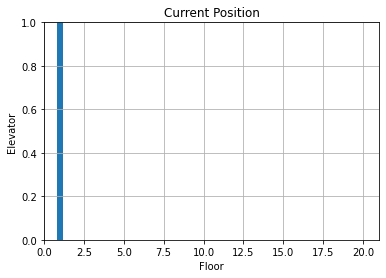

In [13]:
#application
building_elevator = BuildingElevator(20)

for user in range(10):
    random_call_floor = random.randint(1, 20)
    building_elevator.call_elevator(random_call_floor)
    random_destination_floor = random.randint(1, 20)
    building_elevator.enter_passenger(user, random_destination_floor)

building_elevator.move_elevator()

print(f"Final elevator position: {building_elevator.current_floor_of_elevator}")

plt.bar(building_elevator.current_floor_of_elevator, 1, width=0.4)
plt.xlim(0, 21)
plt.ylim(0, 1)
plt.xlabel('Floor')
plt.ylabel('Elevator')
plt.title('Current-Position')
plt.grid(True)
plt.show()